<a href="https://colab.research.google.com/github/NandaAbhilash/CN6005/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# --- 1. Load the California Housing dataset ---
# This dataset is used to predict the median house value in California districts.
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedianHouseValue")


In [ ]:
# Rename columns for better readability in plots (optional but helpful)
X.columns = ['Median_Income', 'House_Age', 'Avg_Rooms', 'Avg_Bedrooms',
             'Population', 'Avg_Occupancy', 'Latitude', 'Longitude']

In [ ]:
# --- 2. Split into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# --- 3. Train a linear regression model ---
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# --- 4. Predict and evaluate ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"--- Model Evaluation (California Housing) ---")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")
print("-" * 40)

--- Model Evaluation (California Housing) ---
Mean Squared Error: 0.556
R² Score: 0.576
----------------------------------------


In [ ]:
# --- 5. SHAP explanation setup ---
# Calculate SHAP values on the test set
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 4129it [00:17, 102.95it/s]                          


In [ ]:
# --- 6. SHAP summary plot (Global Feature Importance) ---
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot: Feature Impact on Median House Value")
plt.tight_layout()
plt.savefig("shap_summary_plot.png")
plt.close()

Generating SHAP Summary Plot...


Displaying: shap_waterfall_instance_10.png


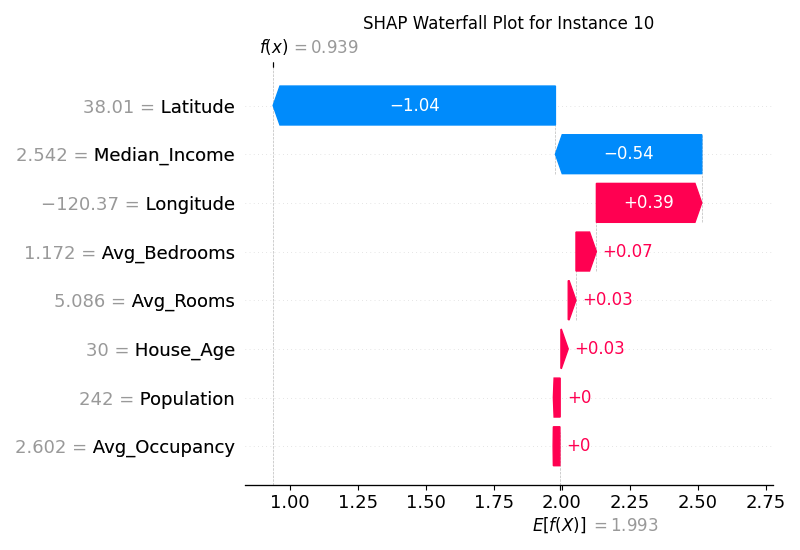

In [ ]:
from IPython.display import Image, display

# Display the saved waterfall plot
waterfall_filename = f"shap_waterfall_instance_{instance_index}.png"
print(f"Displaying: {waterfall_filename}")
display(Image(filename=waterfall_filename))

In [ ]:
# --- 7. Generate SHAP dependence plots (Detailed Feature Interaction) ---
selected_features = ['Median_Income', 'House_Age', 'Latitude']
print(f"Generating SHAP Dependence Plots for: {', '.join(selected_features)}...")

for feature in selected_features:
    shap.dependence_plot(
        feature,
        shap_values.values,
        X_test,
        feature_names=X_test.columns,
        show=False  # Prevent immediate display
    )
    plt.tight_layout()
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()



Generating SHAP Dependence Plots for: Median_Income, House_Age, Latitude...


Displaying: shap_dependence_Median_Income.png


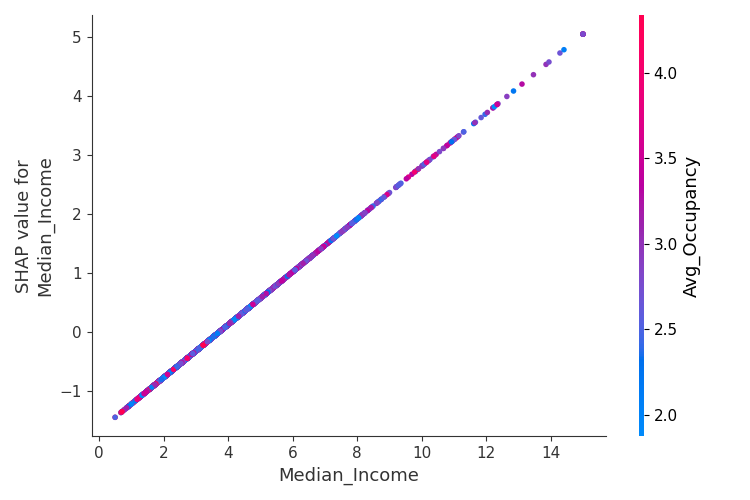

Displaying: shap_dependence_House_Age.png


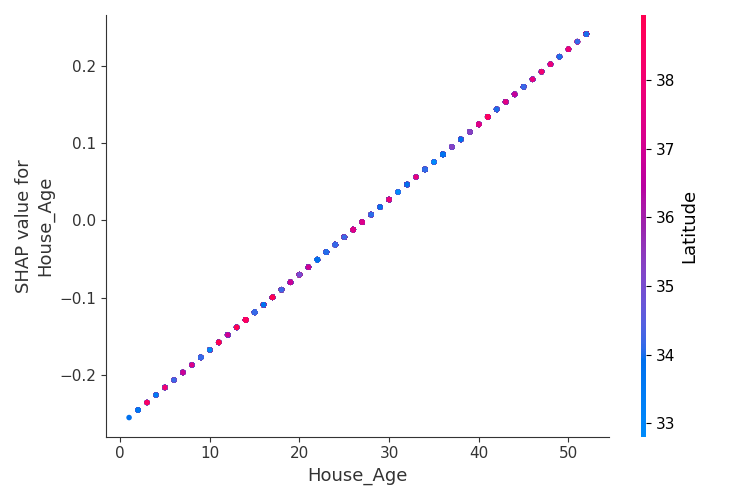

Displaying: shap_dependence_Latitude.png


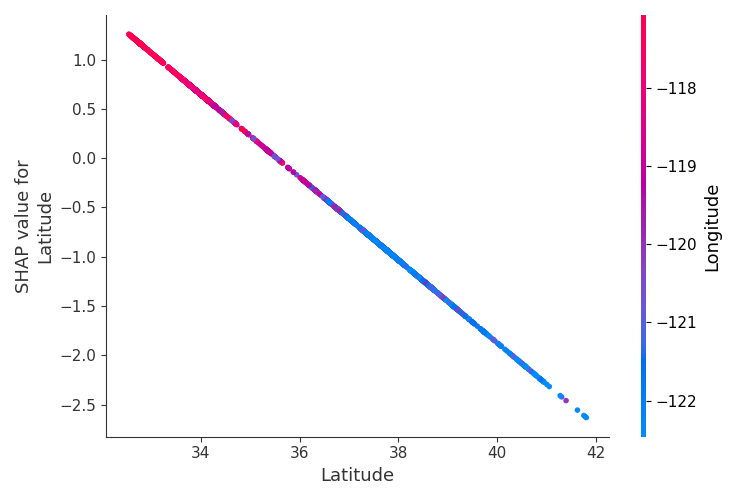

In [ ]:
from IPython.display import Image, display

selected_features = ['Median_Income', 'House_Age', 'Latitude']

for feature in selected_features:
    dependence_filename = f"shap_dependence_{feature}.png"
    print(f"Displaying: {dependence_filename}")
    display(Image(filename=dependence_filename))

In [ ]:
# --- 8. NEW: Individual Instance Explanation (Waterfall Plot) ---
# Select a single observation (the 10th index in the test set) for detailed inspection
instance_index = 10
print(f"Generating SHAP Waterfall Plot for instance index: {instance_index}...")

# Get the SHAP values for the selected instance
instance_shap_values = shap_values[instance_index]

# The Waterfall Plot shows how each feature value moves the prediction
# from the base value (average prediction) to the final prediction.
shap.plots.waterfall(instance_shap_values, show=False)
plt.title(f"SHAP Waterfall Plot for Instance {instance_index}")
plt.tight_layout()
plt.savefig(f"shap_waterfall_instance_{instance_index}.png")
plt.close()

print("All SHAP plots generated and saved as PNG files.")
print("Run the script to see model metrics and generated plots, including the new waterfall plot.")

Generating SHAP Waterfall Plot for instance index: 10...
All SHAP plots generated and saved as PNG files.
Run the script to see model metrics and generated plots, including the new waterfall plot.
